# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Dina Nabila
- Email: dinanabb@gmail.com
- Id Dicoding: dinanabila

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# untuk encoding, normalisasi, preprocessor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# untuk oversampling
from imblearn.over_sampling import SMOTE

# untuk split dataset
from sklearn.model_selection import train_test_split

# untuk model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# untuk evaluasi model klasifikasi
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

# untuk bikin pipeline
from sklearn.pipeline import Pipeline

# untuk simpan model
import joblib

### Menyiapkan data yang akan digunakan

Sumber dataset: https://github.com/dicodingacademy/dicoding_dataset/tree/main/students_performance

In [ ]:
df = pd.read_csv('data.csv', sep=';')
df.head(2)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [ ]:
df.info()
print(f'Jumlah duplikasi data: {df.duplicated().sum()}')
print(f'Jumlah missing value: {df.isna().sum().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Kode berikut dibuat untuk mengidentifikasi mana kolom yang termasuk kategorikal berdasarkan jumlah nilai uniknya. Di sini ambang batas jumlah nilai unik yang diambil sebesar 20.

In [ ]:
threshold = 20  # ambang batas jumlah nilai unik kolom
print("DATA KATEGORIKAL")
print("Nama Kolom: jumlah nilai unik")
print("=============================")
for col in df.columns:
  if df[col].nunique() <= threshold:
  print(f"{col}: {df[col].nunique()}")

DATA KATEGORIKAL
Nama Kolom: jumlah nilai unik
Marital_status: 6
Application_mode: 18
Application_order: 8
Course: 17
Daytime_evening_attendance: 2
Previous_qualification: 17
Displaced: 2
Educational_special_needs: 2
Debtor: 2
Tuition_fees_up_to_date: 2
Gender: 2
Scholarship_holder: 2
International: 2
Curricular_units_1st_sem_without_evaluations: 11
Curricular_units_2nd_sem_credited: 19
Curricular_units_2nd_sem_approved: 20
Curricular_units_2nd_sem_without_evaluations: 10
Unemployment_rate: 10
Inflation_rate: 9
GDP: 10
Status: 3


**Insight:** <br>

Berdasarkan hasil output kode-kode sebelumnya, berikut gambaran umum dataset yang kita gunakan:

**Data Kategorikal:**
- **Marital_status** - status pernikahan
- **Application_mode** - jenis jalur pendaftaran
- **Application_order** - urutan pilihan pendaftaran
- **Course** - program studi
- **Daytime_evening_attendance** - waktu kehadiran (pagi/malam)
- **Previous_qualification** - tingkat pendidikan sebelumnya
- **Nacionality** - kewarganegaraan
- **Mothers_qualification** - kualifikasi pendidikan ibu
- **Fathers_qualification** - kualifikasi pendidikan ayah
- **Mothers_occupation** - pekerjaan ibu
- **Fathers_occupation** - pekerjaan ayah
- **Displaced** - apakah mahasiswa termasuk pengungsi atau berpindah tempat tinggal (0: tidak, 1: iya)
- **Educational_special_needs** - apakah memiliki kebutuhan pendidikan khusus (0: tidak, 1: iya)
- **Debtor** - status memiliki utang (0: tidak, 1: iya)
- **Tuition_fees_up_to_date** - status pembayaran uang kuliah (0: nunggak, 1: lunas)
- **Gender** - jenis kelamin (0: perempuan, 1: laki-laki)
- **Scholarship_holder** - apakah penerima beasiswa? (0: tidak, 1: iya)
- **International** - status mahasiswa internasional (0: tidak, 1: iya)

<br>

**Data Numerikal:**
- **Previous_qualification_grade** - skor kualifikasi pendidikan sebelumnya (rentang 0 s.d. 200)
- **Admission_grade** - nilai masuk
- **Age_at_enrollment** - usia saat masuk kuliah
- **Curricular_units_1st_sem_credited** - jumlah mata kuliah semester 1 yang diakui
- **Curricular_units_1st_sem_enrolled** - jumlah mata kuliah semester 1 yang diambil
- **Curricular_units_1st_sem_evaluations** - jumlah evaluasi semester 1
- **Curricular_units_1st_sem_approved** - jumlah mata kuliah semester 1 yang lulus
- **Curricular_units_1st_sem_grade** - rata-rata nilai semester 1
- **Curricular_units_1st_sem_without_evaluations** - jumlah mata kuliah semester 1 tanpa evaluasi
- **Curricular_units_2nd_sem_credited** - jumlah mata kuliah semester 2 yang diakui
- **Curricular_units_2nd_sem_enrolled** - jumlah mata kuliah semester 2 yang diambil
- **Curricular_units_2nd_sem_evaluations** - jumlah evaluasi semester 2
- **Curricular_units_2nd_sem_approved** - jumlah mata kuliah semester 2 yang lulus
- **Curricular_units_2nd_sem_grade** - rata-rata nilai semester 2
- **Curricular_units_2nd_sem_without_evaluations** - jumlah mata kuliah semester 2 tanpa evaluasi
- **Unemployment_rate** - tingkat pengangguran
- **Inflation_rate** - tingkat inflasi
- **GDP** - produk domestik bruto

<br>

**Data Target:**
- **Status** - status mahasiswa (Dropout/Graduate/Enrolled)

Sekarang mari kita amati persentase perbandingan jumlah mahasiswa berdasarkan status saat ini (Dropout/Graduate/Enrolled) dengan bar dan pie chart berikut.

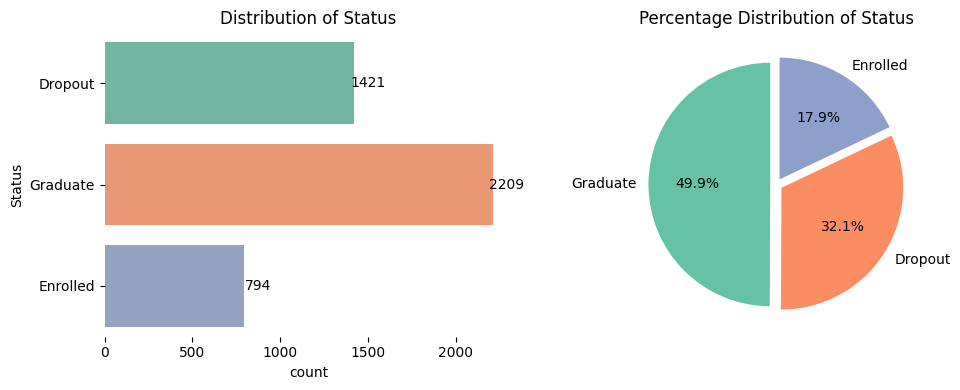

In [ ]:
column_name = 'Status'
plt.figure(figsize=(10, 4))

# first subplot: count plot
plt.subplot(1, 2, 1)
sns.countplot(y=column_name, hue=column_name, legend=False, data=df, palette='Set2')
plt.title(f'Distribution of {column_name}')

ax = plt.gca()
for p in ax.patches:
  ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center', xytext=(10, 0), textcoords='offset points')

sns.despine(left=True, bottom=True)

# second subplot: Pie chart
plt.subplot(1, 2, 2)
df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90, explode=[0.05]*df[column_name].nunique())
plt.title(f'Percentage Distribution of {column_name}')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Insight:** <br>
Hampir 50% mahasiswa lulus (Graduate), dan 32.1% Dropout. Sisanya masih berstatus aktif (Enrolled), dan perlu kita prediksi statusnya setelah membangun model nanti.

Untuk membangun model, yang akan kita gunakan hanya data mahasiswa yang berstatus Graduate atau Dropout. Dan karena masing-masing jumlah datanya belum cukup seimbang (49.9% Vs 32.1%), di data preprocessing nanti kita akan terapkan SMOTE untuk oversampling, agar datanya menjadi seimbang untuk digunakan melatih model nanti.

Selanjutnya kita buat dua list baru, masing-masing berisi kolom-kolom categorical / numerical. Ini dibuat dengan tujuan mempermudah pembangunan plot untuk analisis data.

In [ ]:
categorical_columns = ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']
numerical_columns = ['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']

Berikut distribusi data numerikal univariat dengan menggunakan histogram.

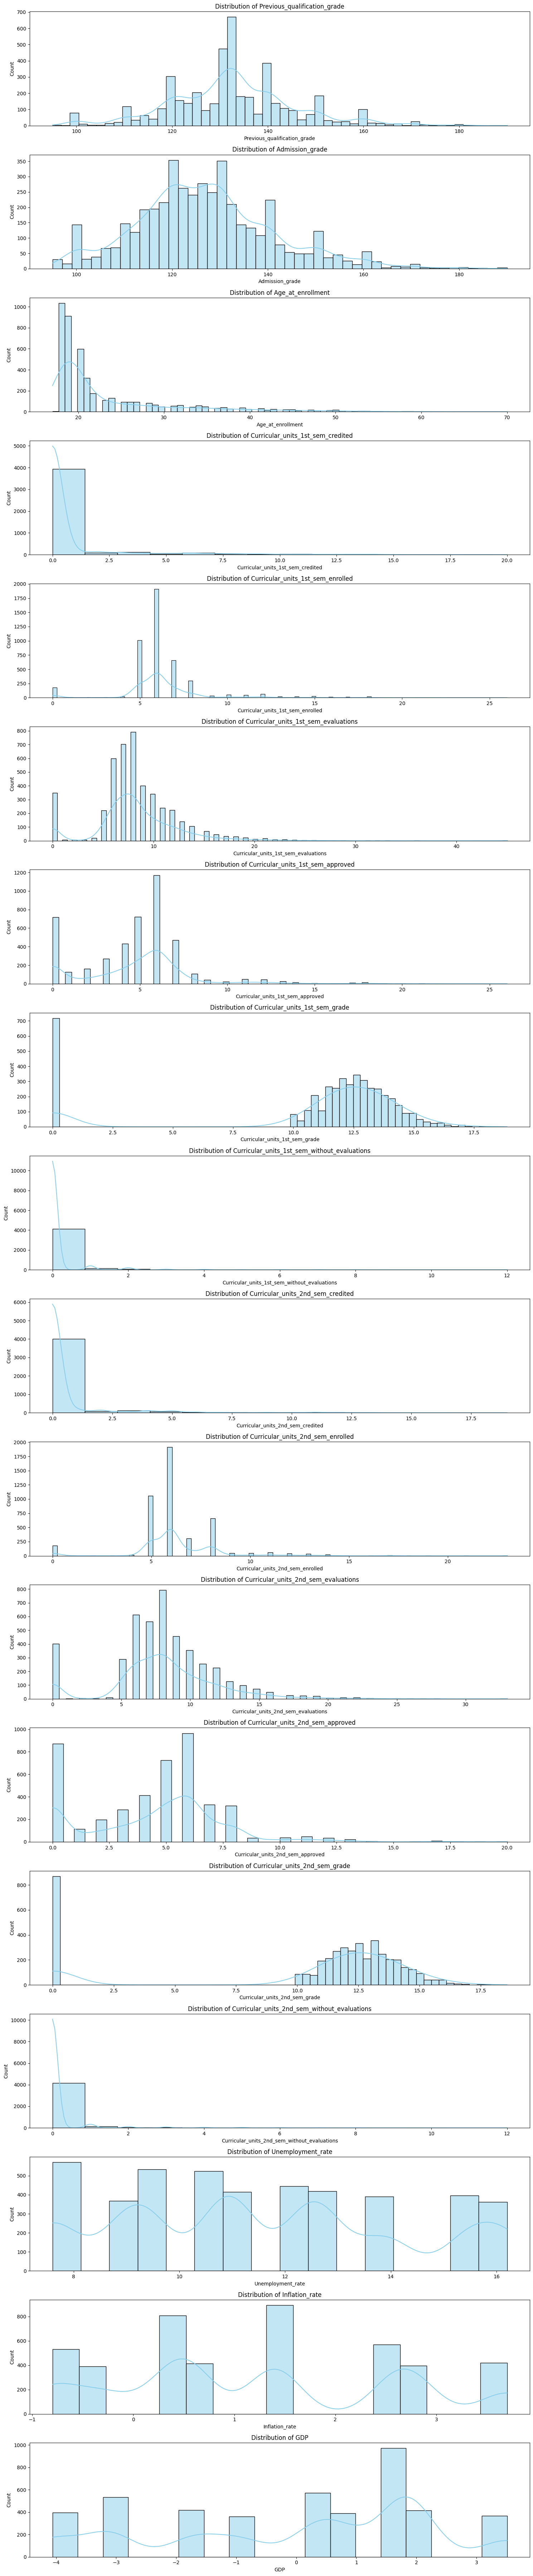

In [ ]:
# plot distribusi data numerikal
plt.figure(figsize=(15, 4 * len(numerical_columns)))
for i, col in enumerate(numerical_columns):
  plt.subplot(len(numerical_columns), 1, i + 1)
  sns.histplot(df[col], kde=True, color='skyblue')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.tight_layout()
plt.show()

Selanjutnya, berikut distribusi variabel numerik dengan menggunakan boxplot. Ini berguna untuk mendeteksi outlier pada setiap kolom numerik.

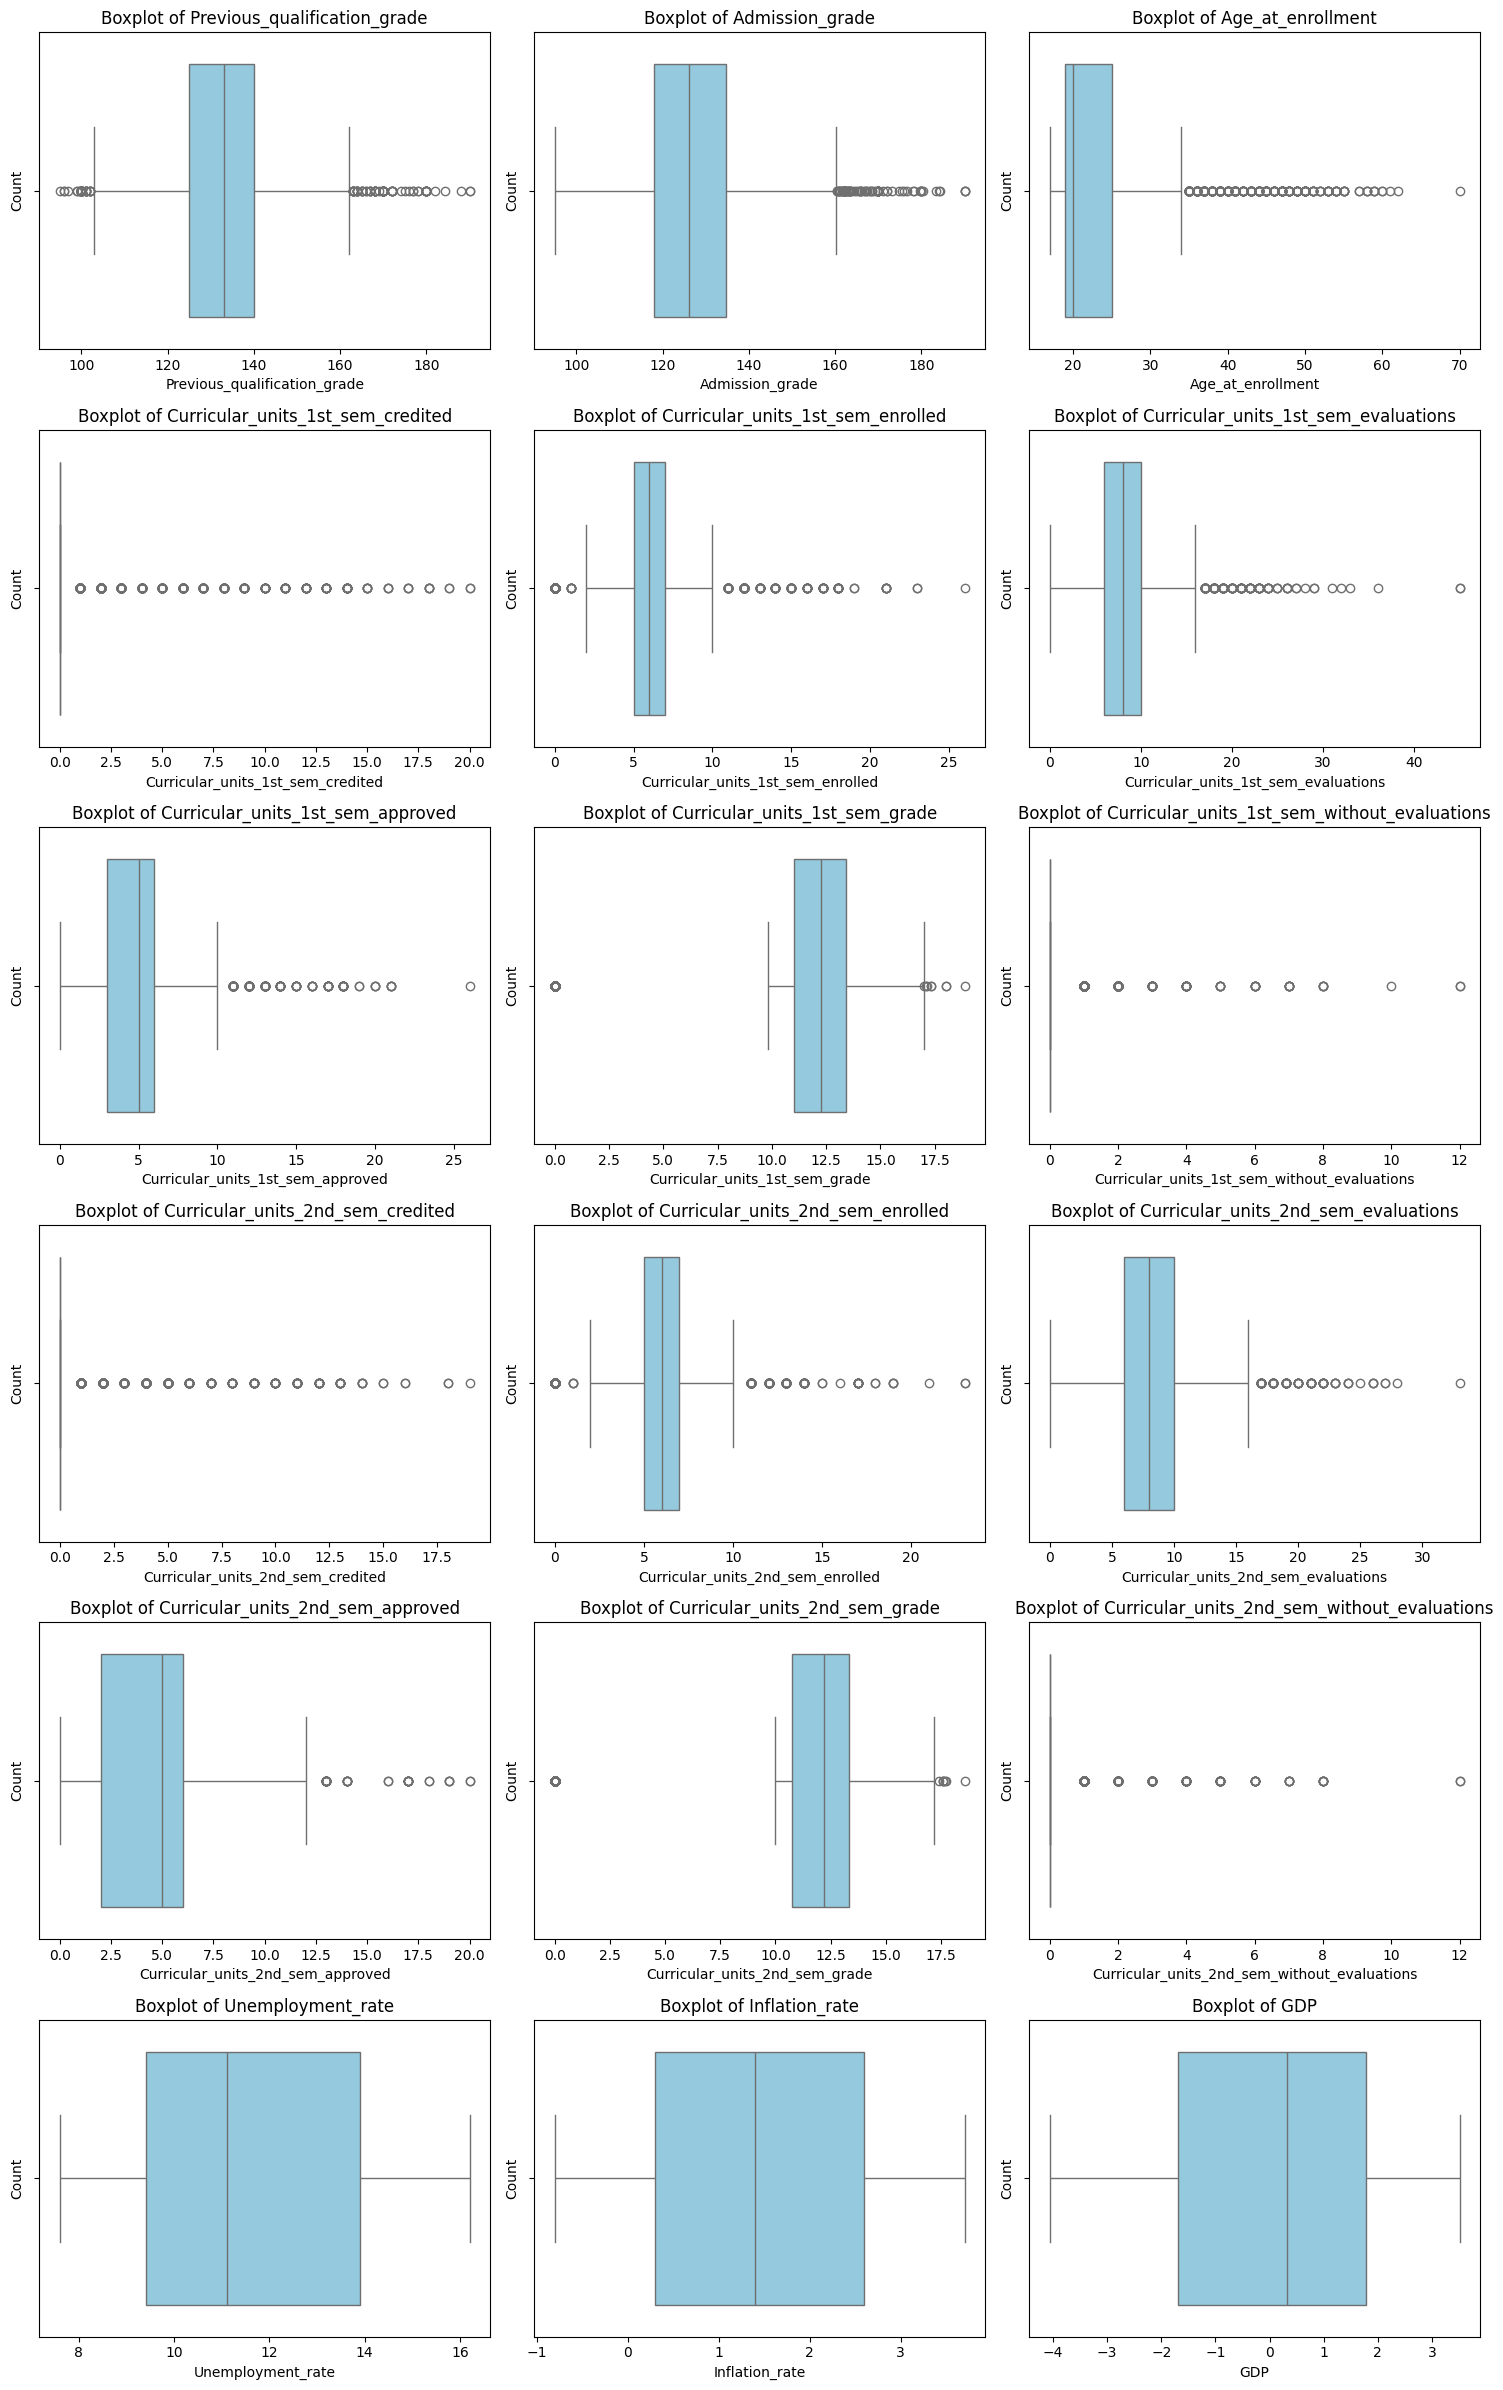

In [ ]:
# =======================================================
# periksa distribusi variabel numerik menggunakan boxplot
# =======================================================
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(numerical_columns):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.boxplot(x=df[col], color='skyblue')
  plt.title(f"Boxplot of {col}")
  plt.xlabel(col)
  plt.ylabel('Count')

plt.tight_layout()
plt.show()

Lagi, berikut distribusi variabel kategorikal univariat dengan menggunakan barplot.

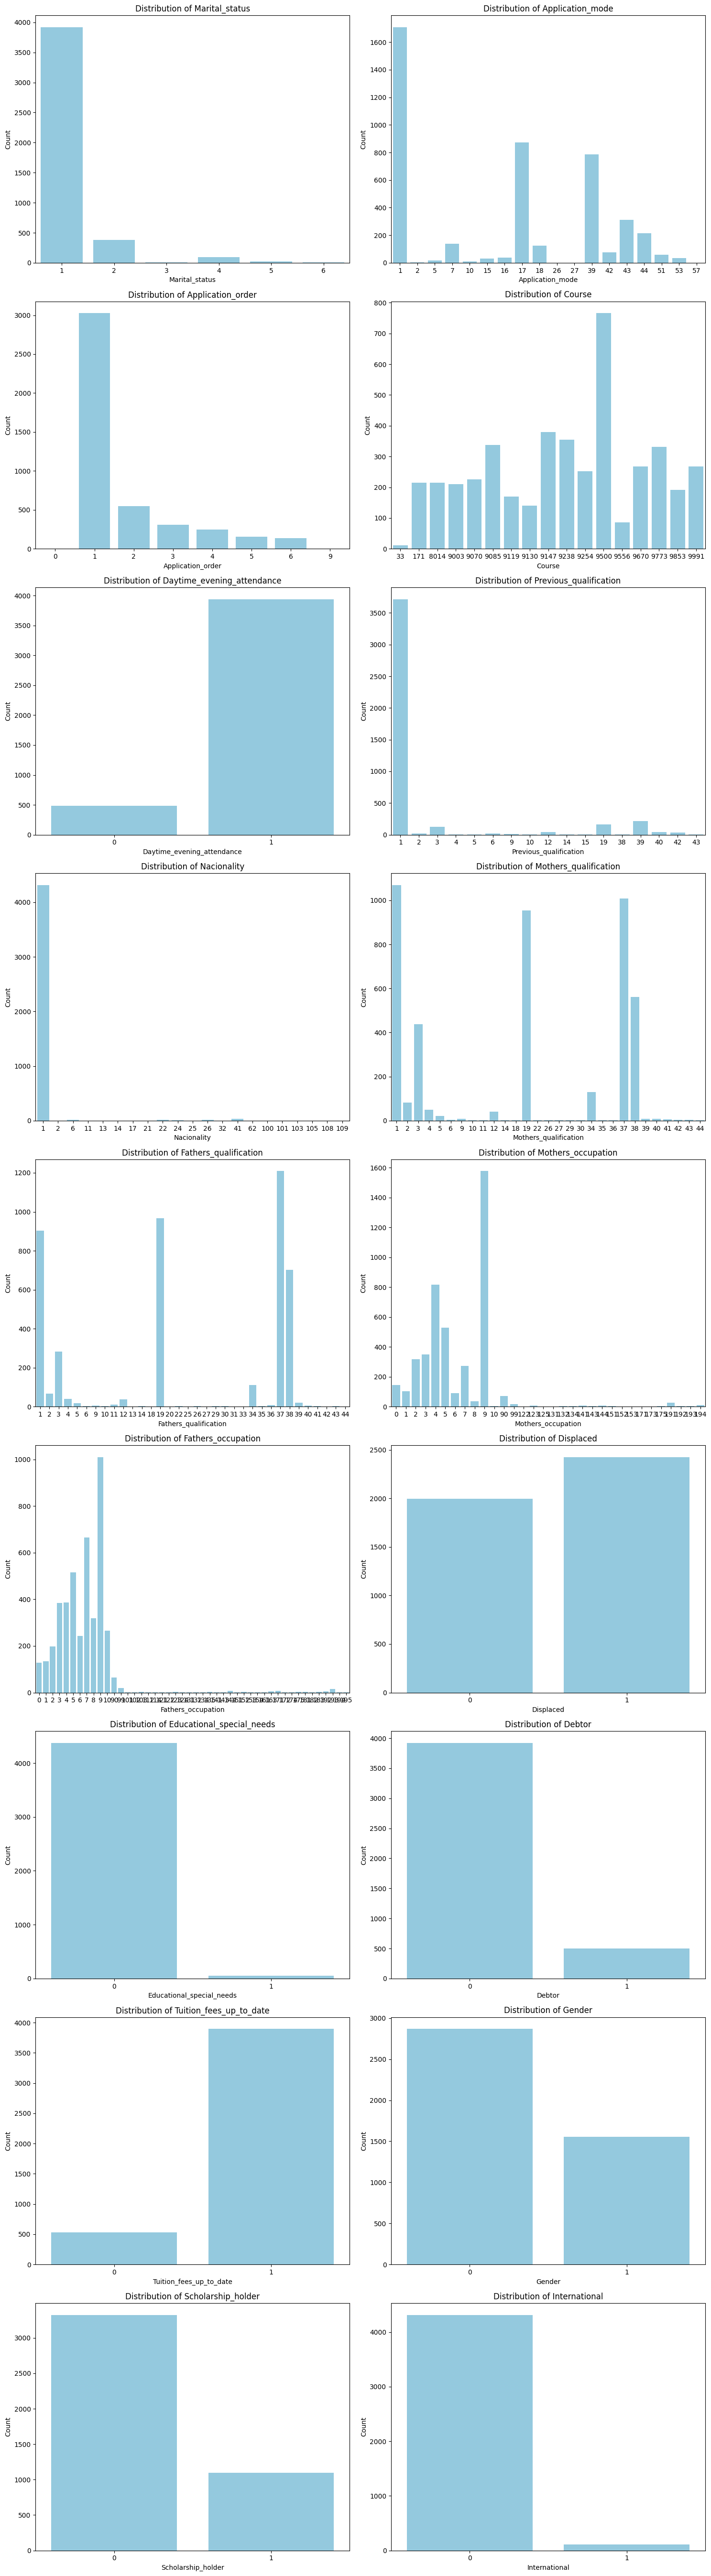

In [ ]:
# ===========================================================
# periksa distribusi variabel kategorikal menggunakan barplot
# ===========================================================

n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 6 * n_rows))

for i, col in enumerate(categorical_columns):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.countplot(data=df, x=col, color='skyblue')
  # sns.countplot(data=df, x=col, hue='Attrition', palette='Set2')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')

  # miringkan label non-numerik supaya ga tumpang tindih
  unique_vals = df[col].dropna().unique()
  # cek apakah isinya string dan bukan hanya 'yes'/'no' (dengan ignore case)
  is_all_string = all(isinstance(val, str) for val in unique_vals)
  unique_lower = set(val.lower() for val in unique_vals if isinstance(val, str))

  if is_all_string and not unique_lower.issubset({'y', 'yes', 'no'}):
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Sip. Analisis univariat selesai. Sekarang mari kita beralih ke analisis distribusi data berdasarkan fitur target: Status. Kita mulai dari histogram data numerikal berikut.

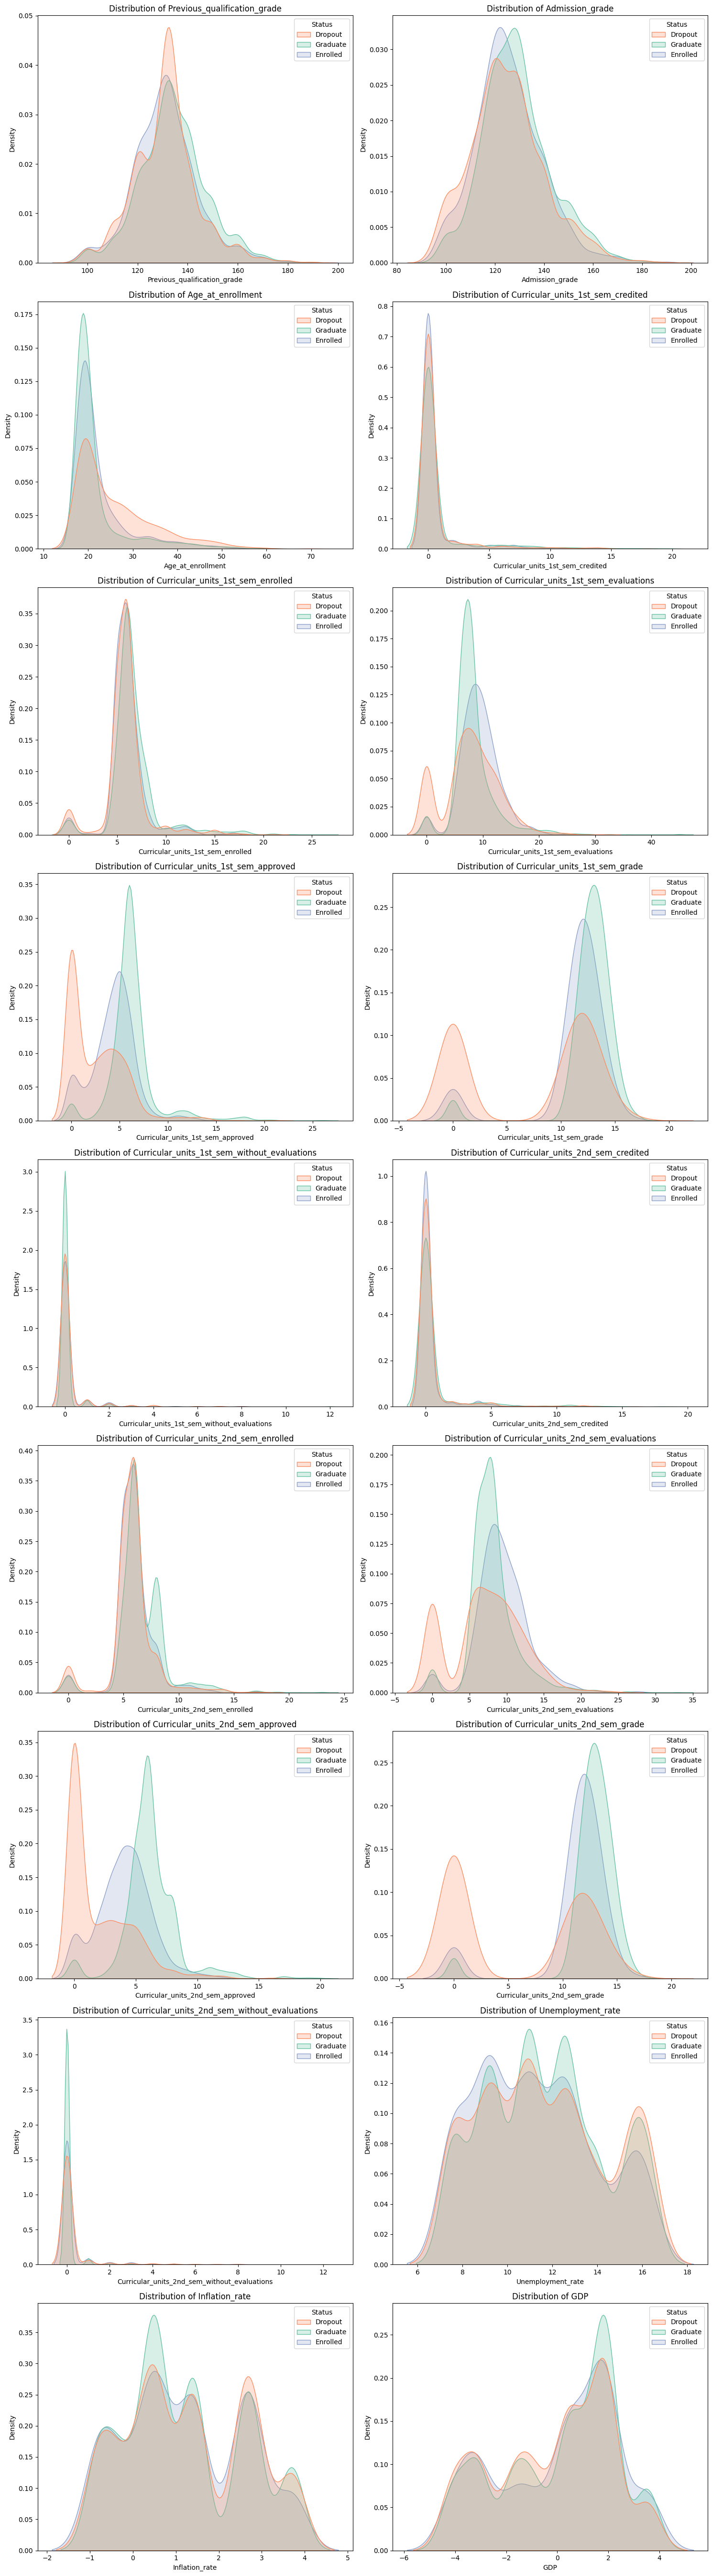

In [ ]:
# =======================================================================
# plot distribusi data numerikal menggunakan histogram berdasarkan Status
# =======================================================================
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
palette_status = {
  'Graduate': '#66C2A5',  # hijau
  'Enrolled': '#8DA0CB',  # biru
  'Dropout': '#FC8D62'    # merah
}
plt.figure(figsize=(15, 6 * n_rows))
for i, col in enumerate(numerical_columns):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.kdeplot(data=df, x=col, hue='Status', common_norm=False, palette=palette_status, fill=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.tight_layout()
plt.show()

Lalu, ke boxplot sebagai berikut.

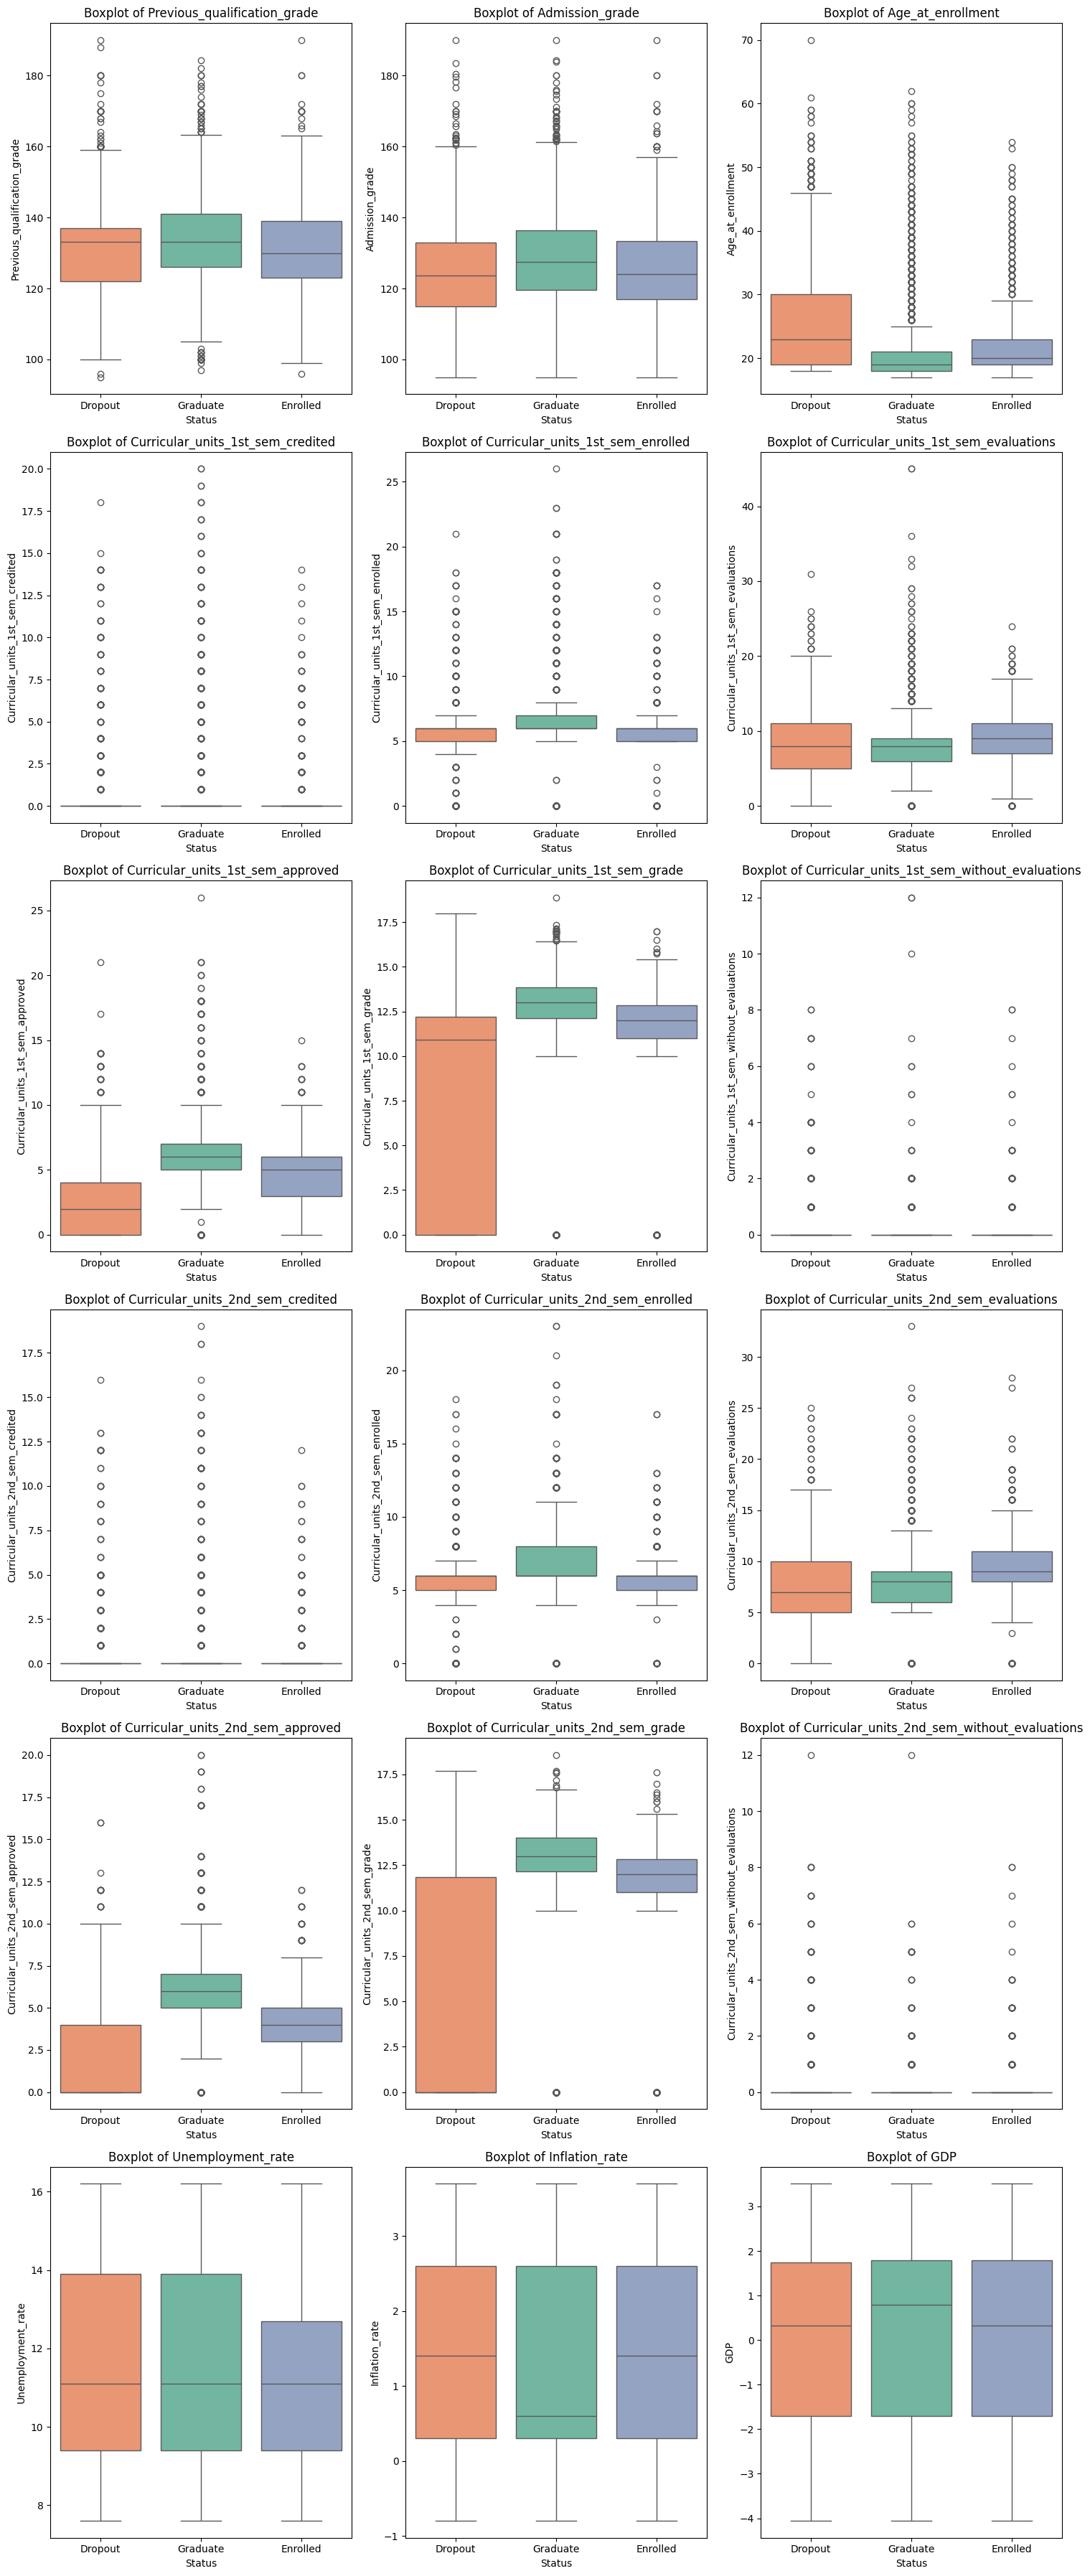

In [ ]:
# =======================================================================================================
# membandingkan distribusi variabel numerik mahasiswa yang dropout/enrolled/graduated menggunakan boxplot
# =======================================================================================================
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

palette_status = {
  'Graduated': '#66C2A5',  # hijau
  'Enrolled': '#8DA0CB',  # biru
  'Dropout': '#FC8D62'    # merah
}

plt.figure(figsize=(15, 6 * n_rows))

for i, col in enumerate(numerical_columns):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.boxplot(x='Status', y=col, data=df, hue='Status', palette=palette_status)
  plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

Dan, last tapi belum berakhir, berikut perbandingan jumlah data kategorikal berdasarkan Status mahasiswa saat ini, dengan menggunakan countplot.

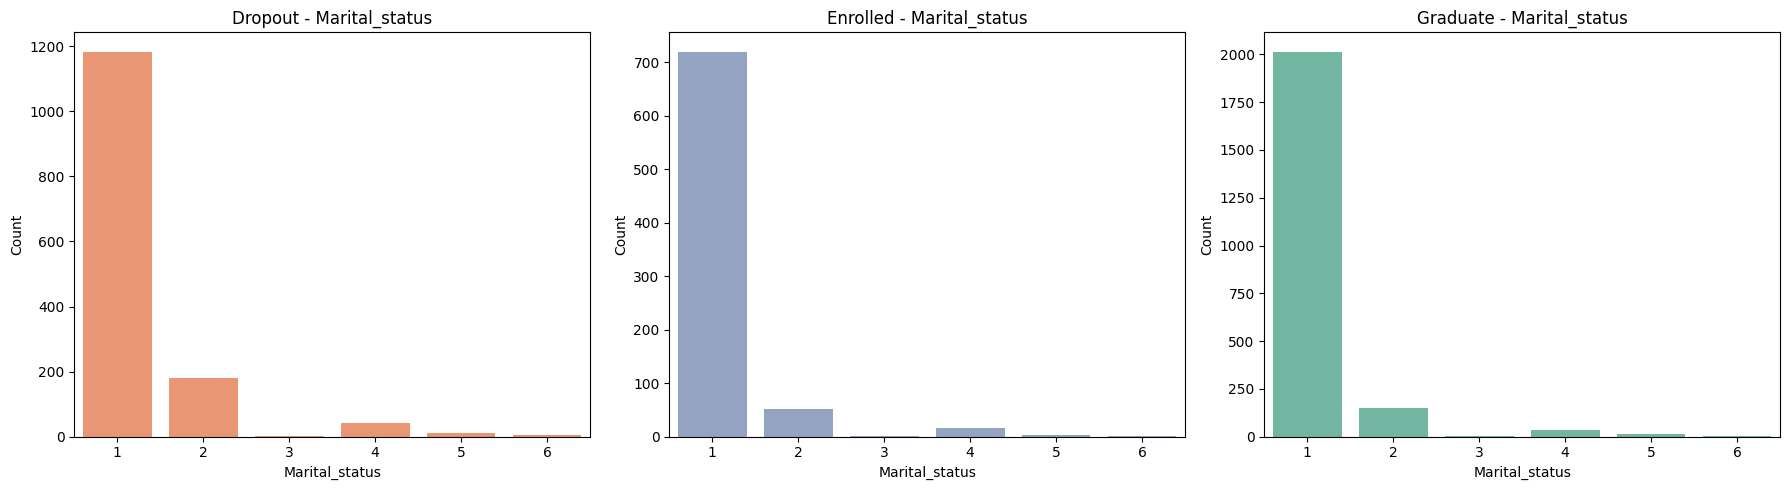

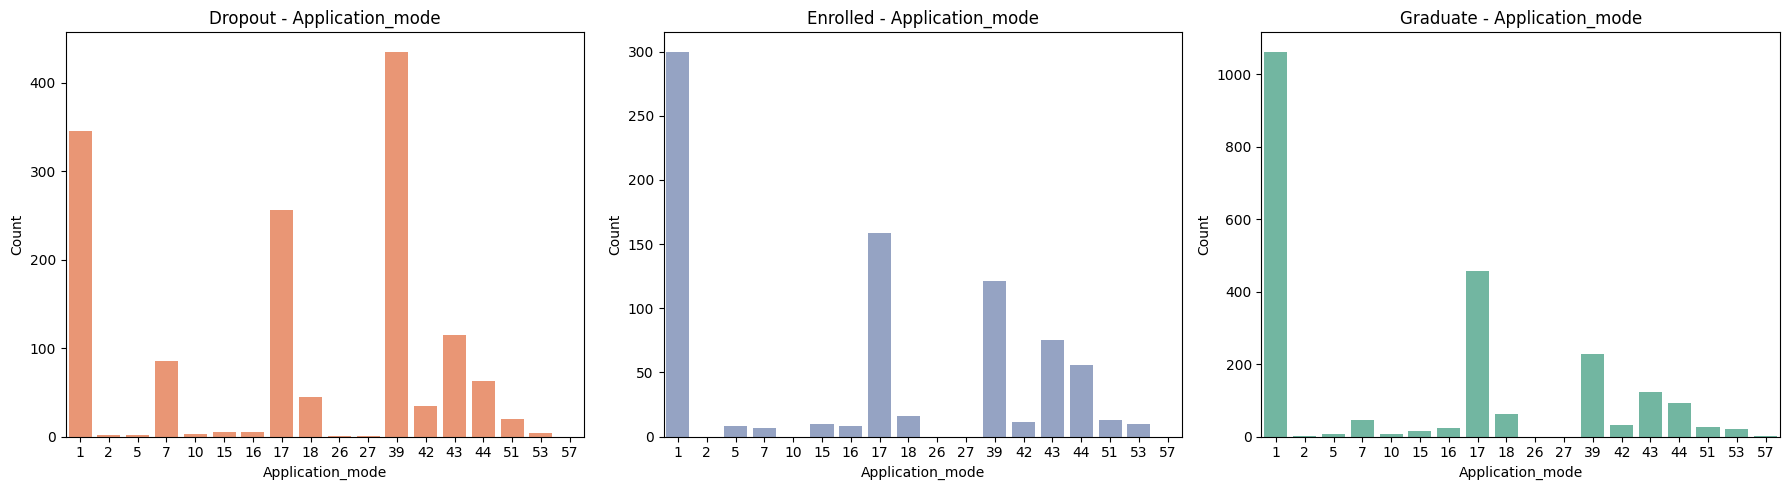

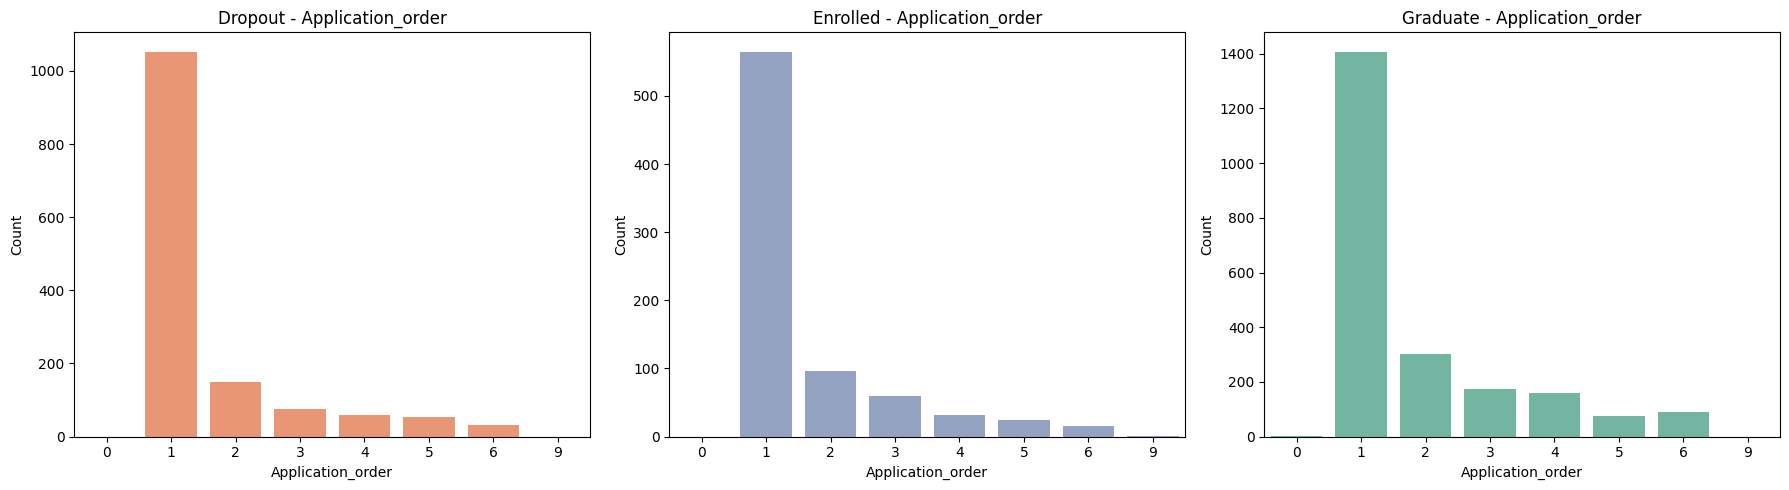

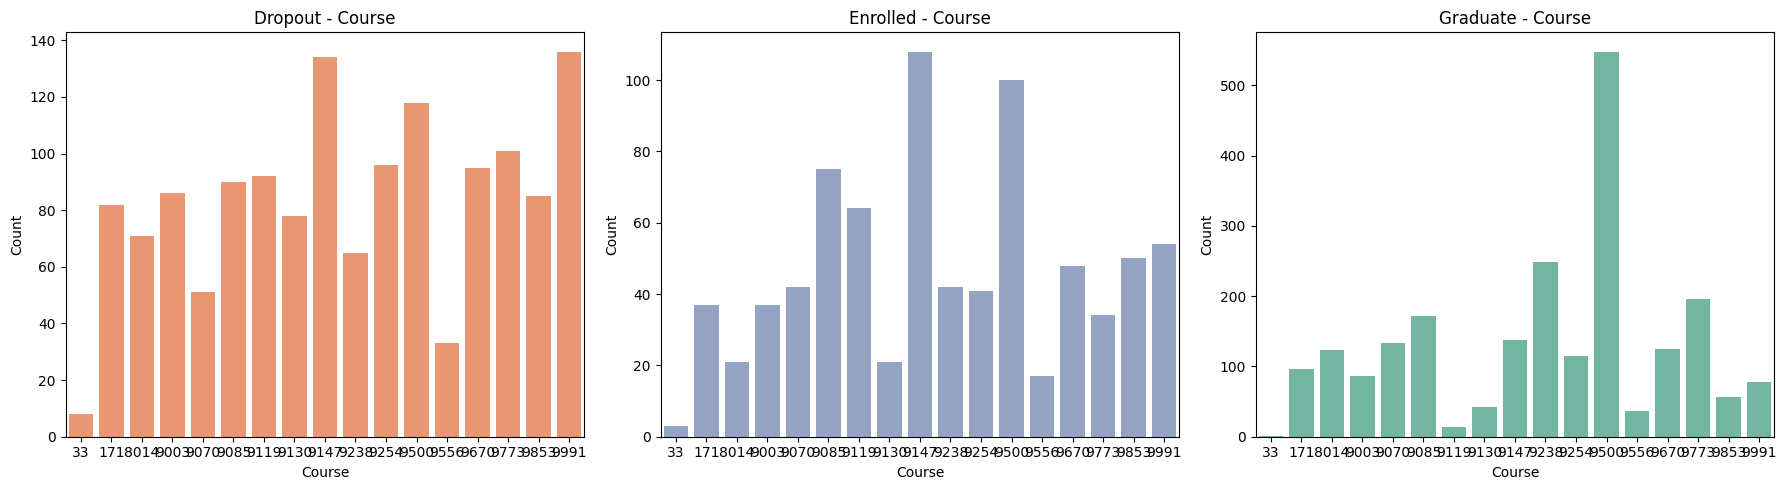

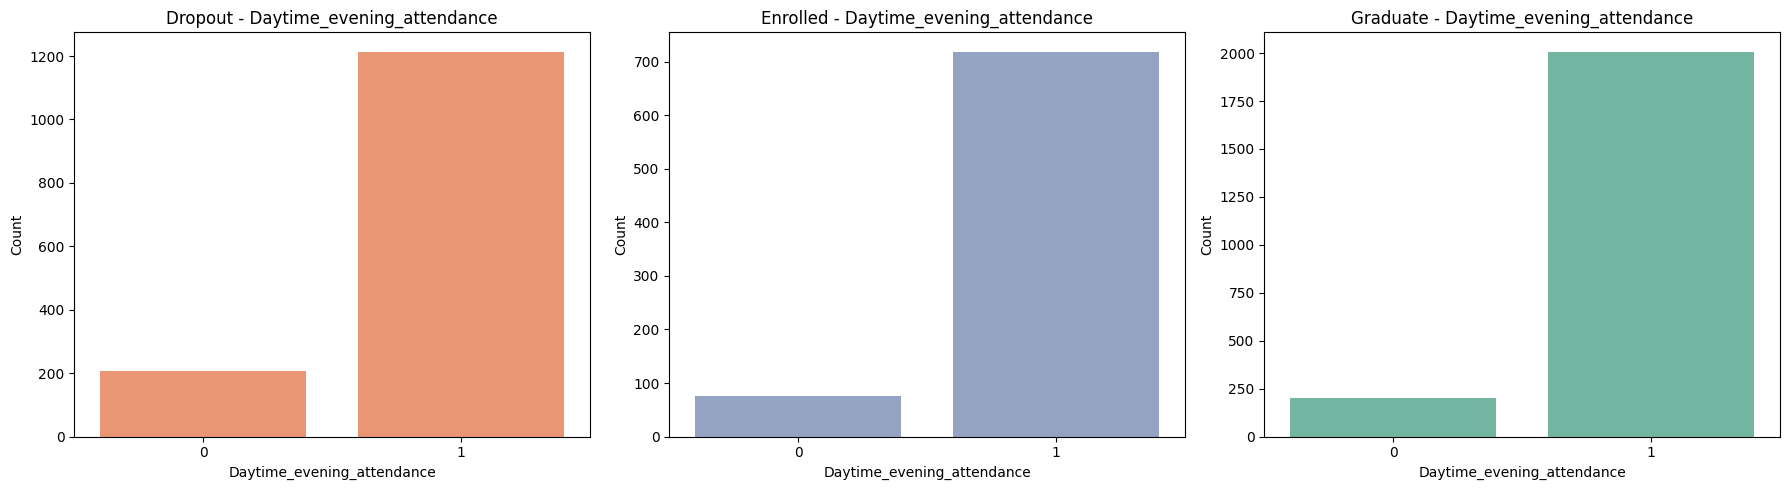

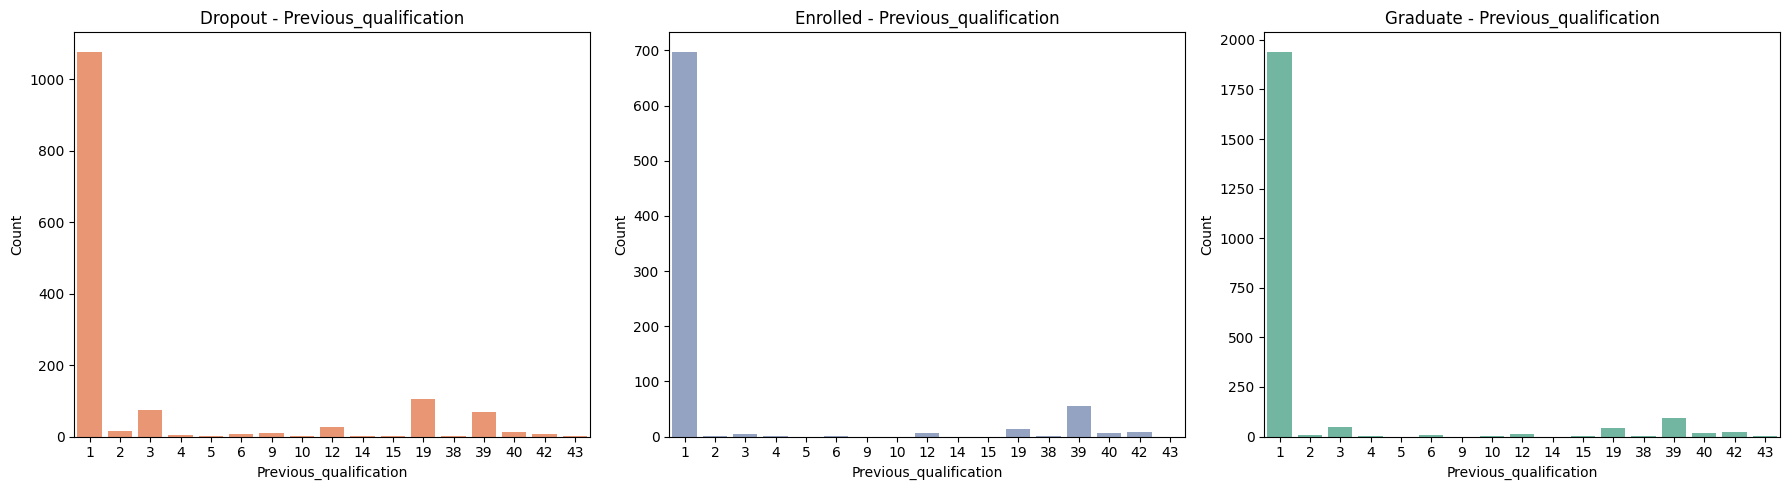

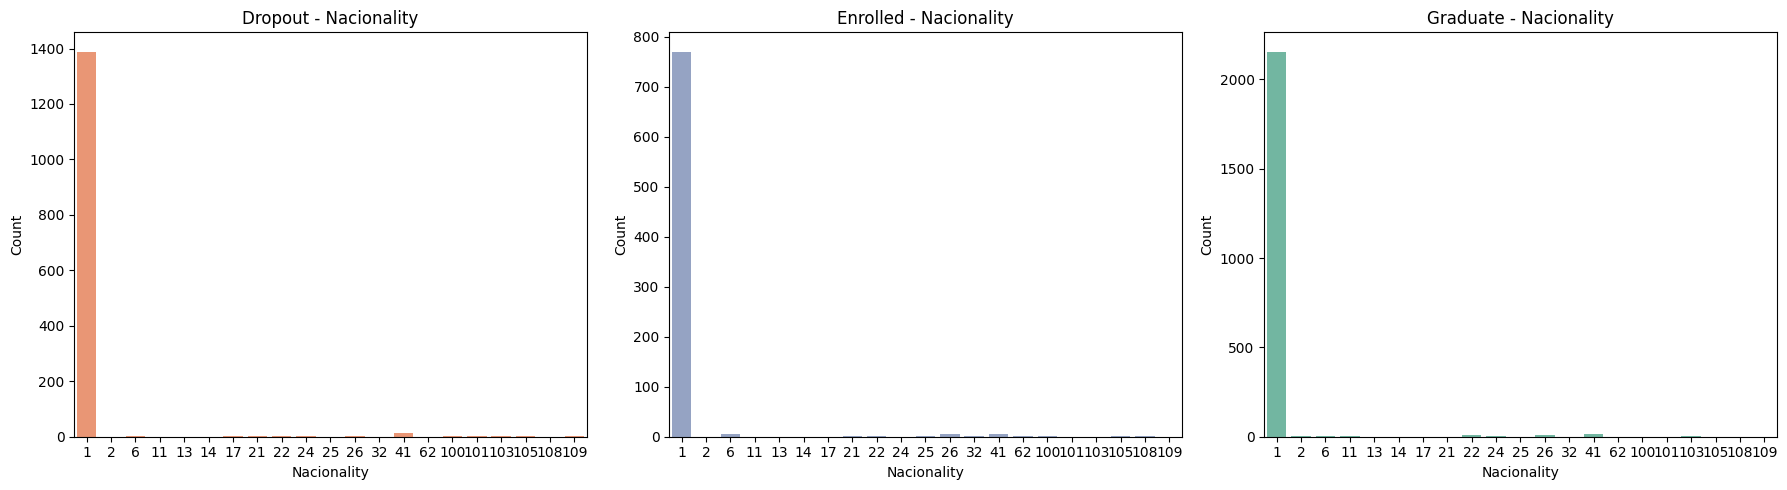

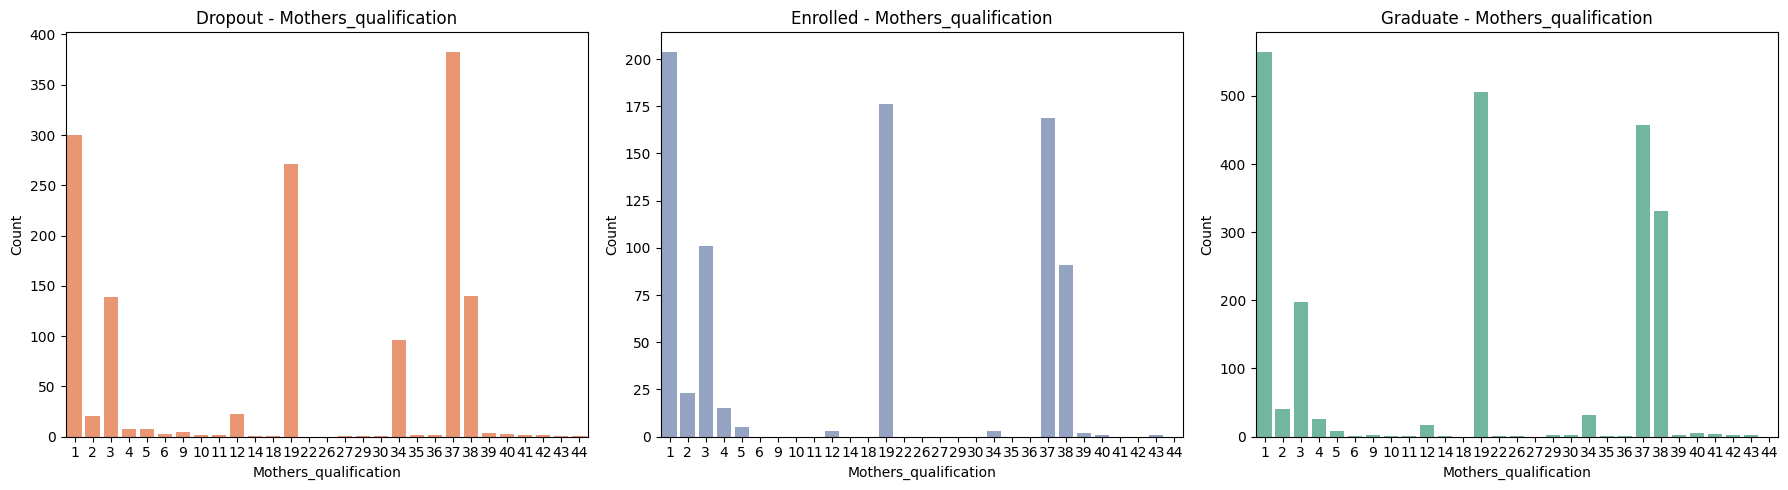

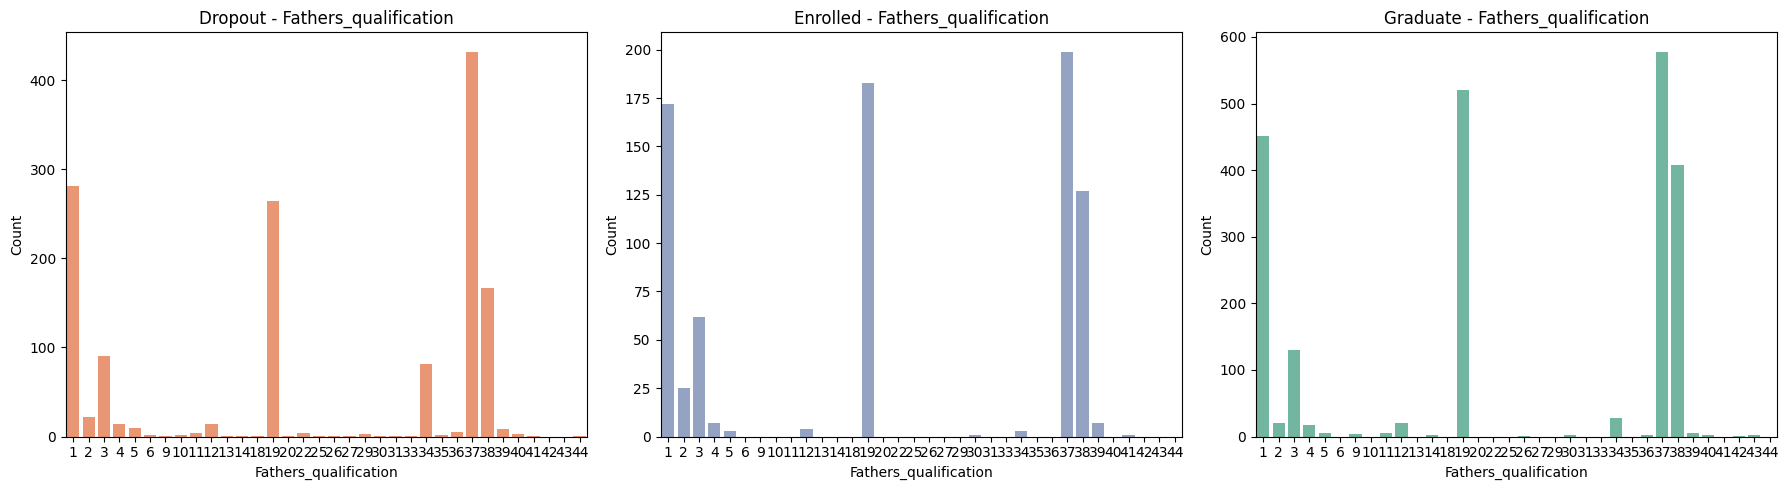

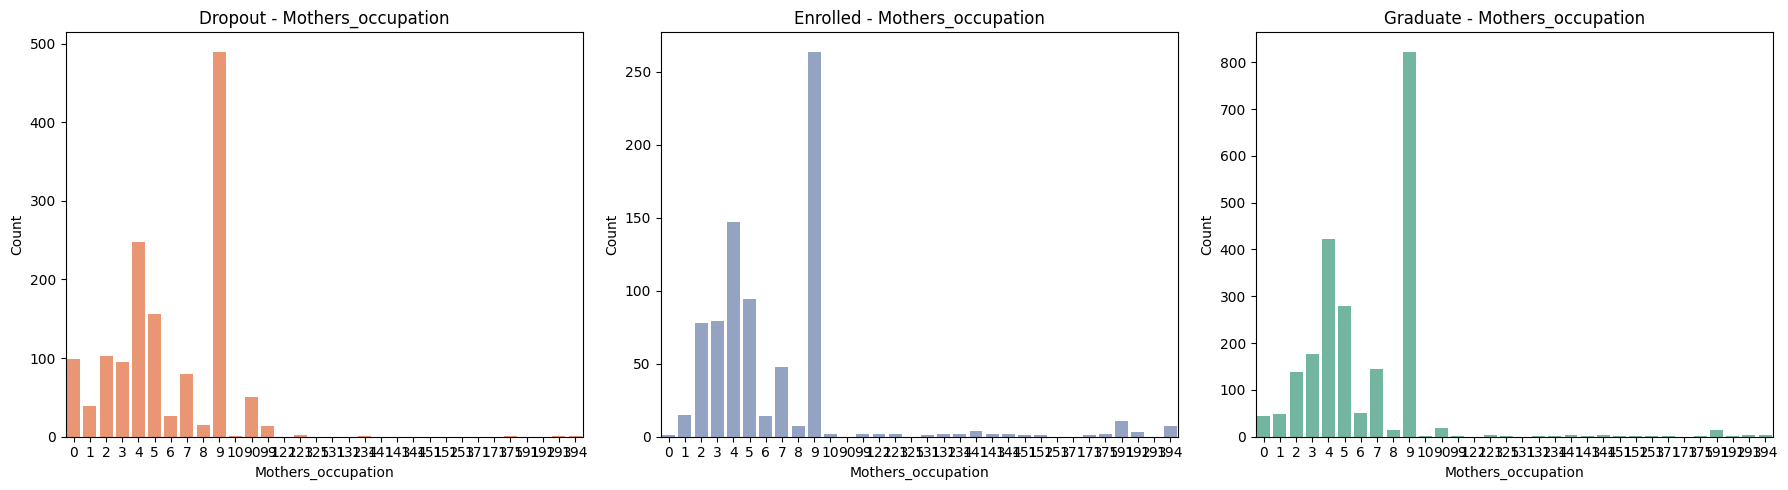

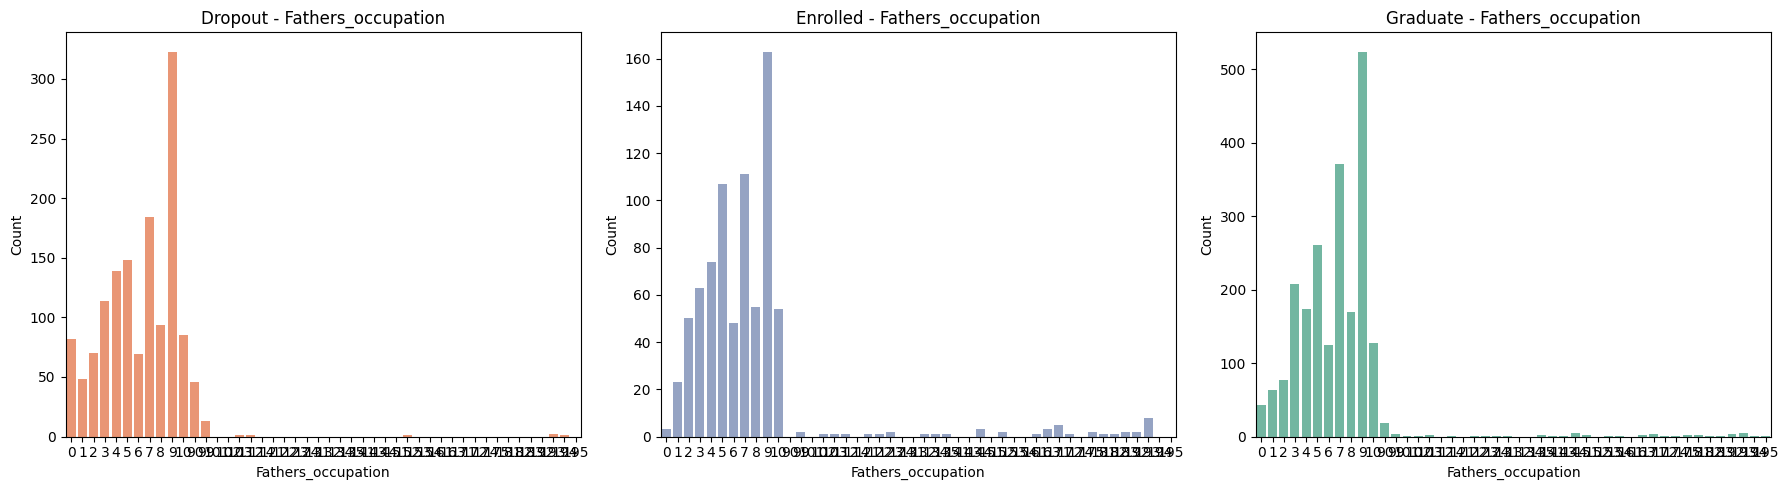

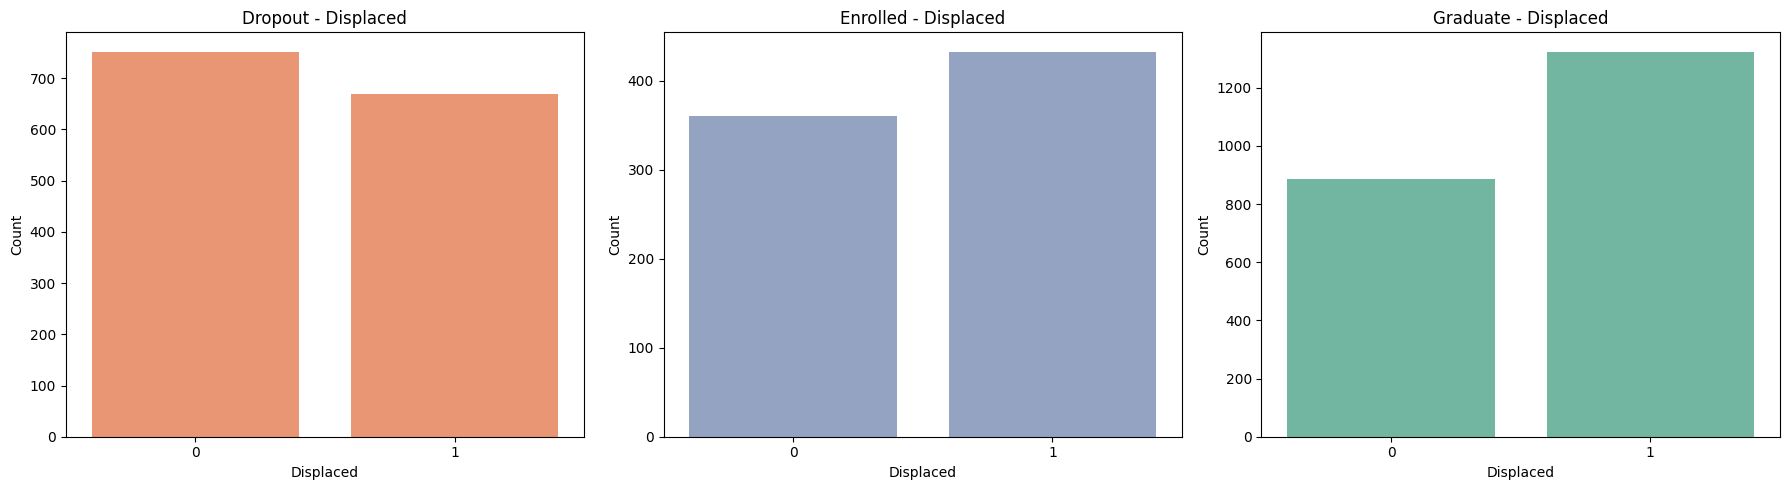

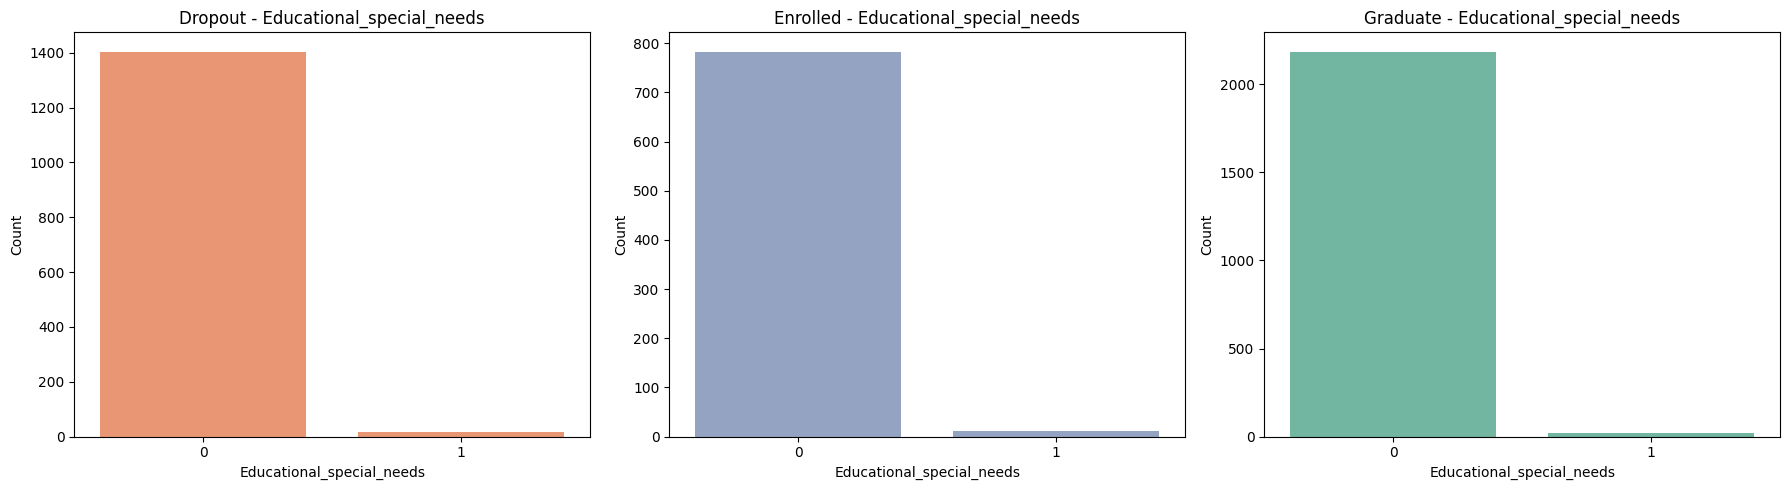

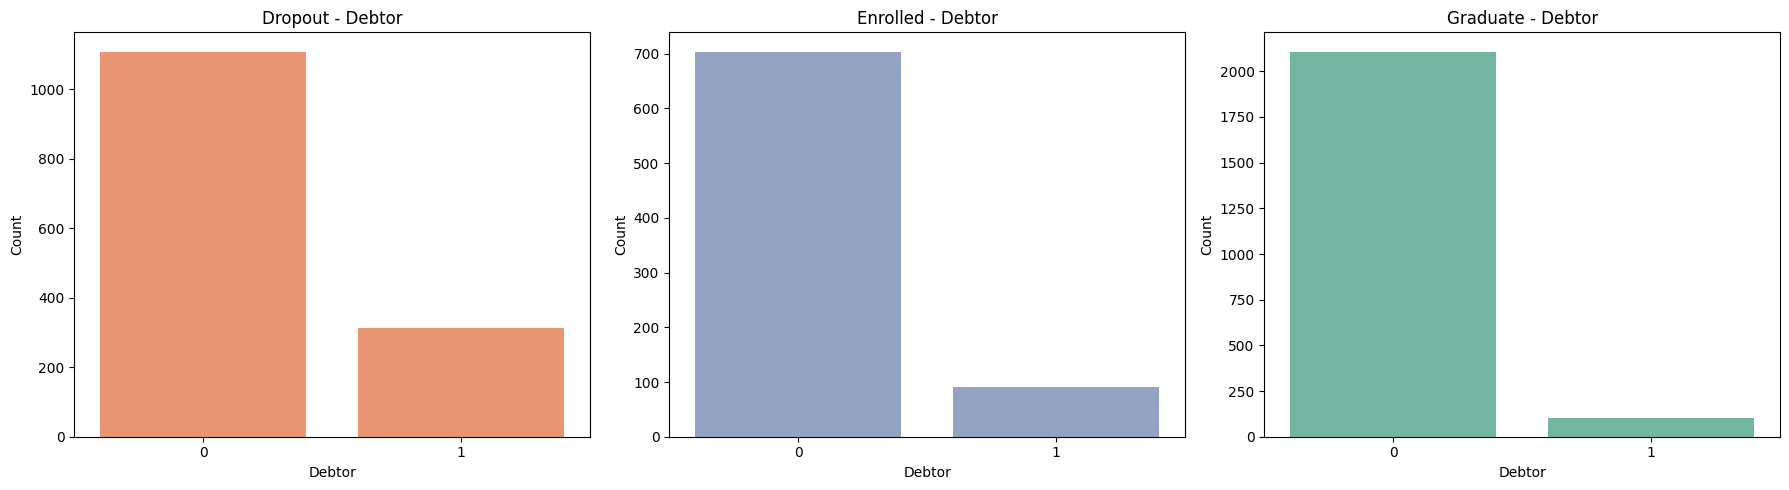

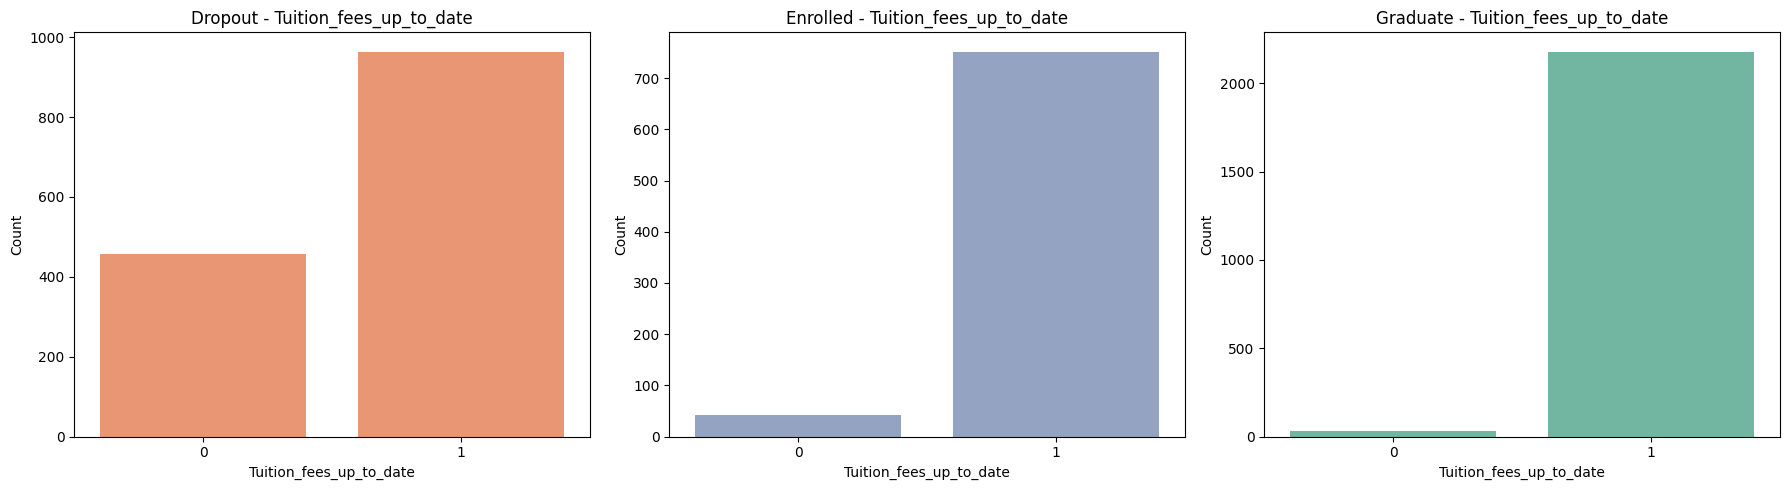

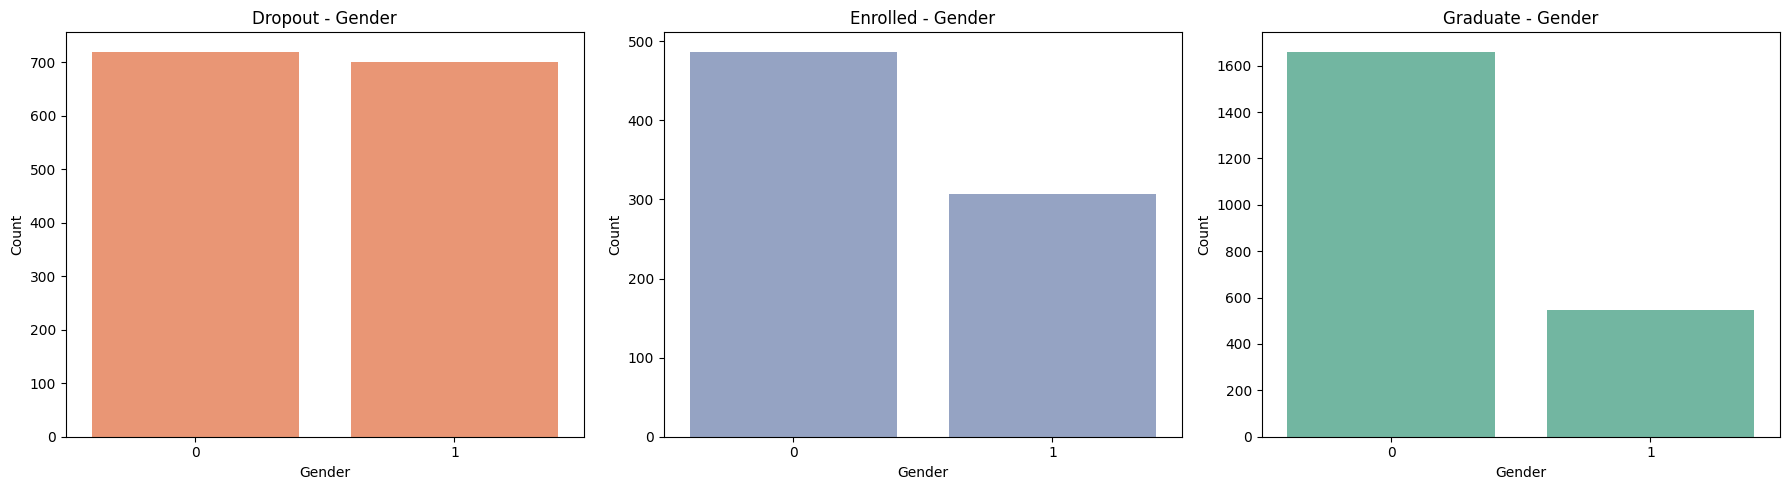

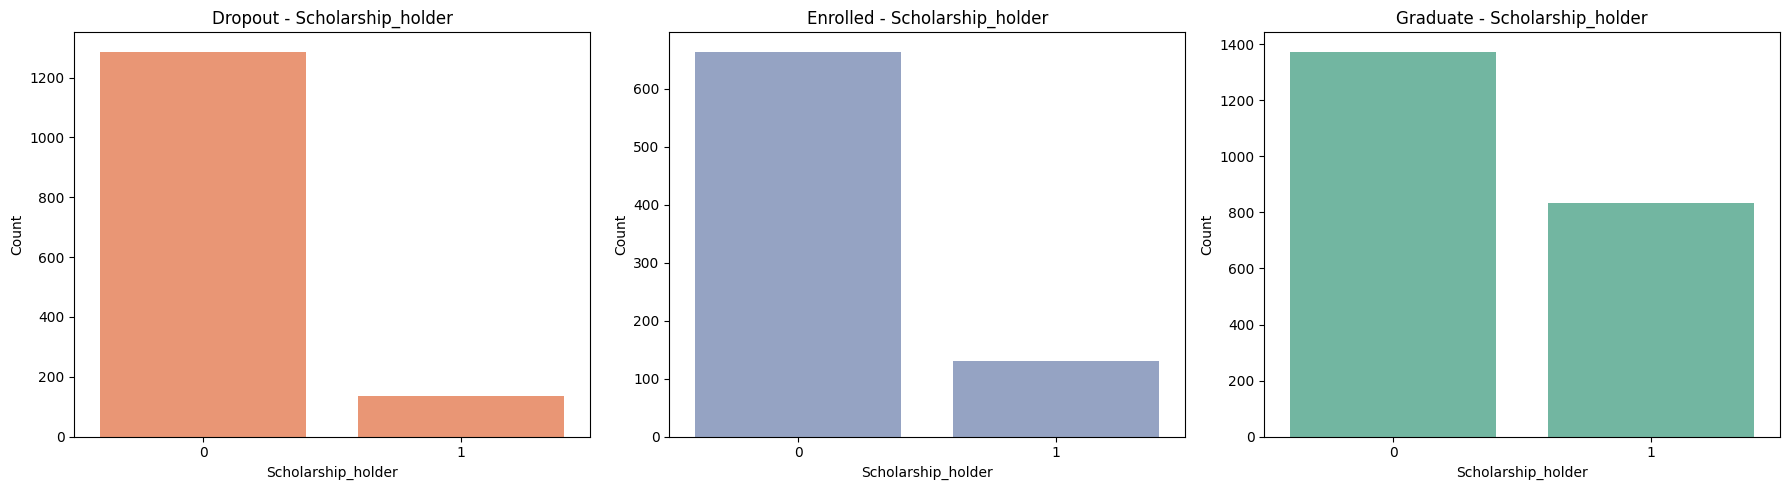

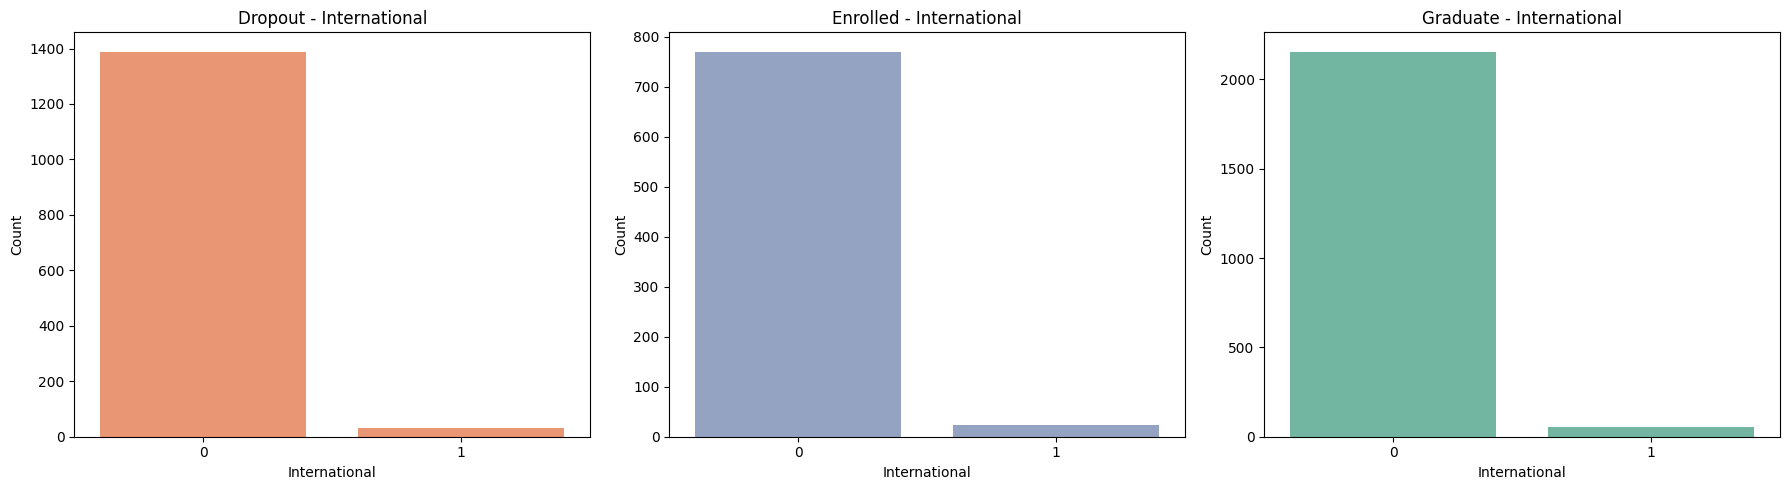

In [ ]:
status_labels = ['Dropout', 'Enrolled', 'Graduate']
status_colors = {'Dropout': '#FC8D62', 'Enrolled': '#8DA0CB', 'Graduate': '#66C2A5'}

for col in categorical_columns:
  # Urutkan label kategori: angka dulu jika bisa, string kalau tidak
  cat_order = sorted(df[col].dropna().unique(), key=lambda x: int(x) if str(x).isdigit() else str(x))

  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=False)

  for i, status in enumerate(status_labels):
    subset = df[df['Status'] == status]
    sns.countplot(data=subset, x=col, ax=axes[i], color=status_colors[status], order=cat_order)
    axes[i].set_title(f'{status} - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

    # Miringkan label jika perlu
    is_all_string = all(isinstance(val, str) for val in cat_order)
    unique_lower = set(val.lower() for val in cat_order if isinstance(val, str))

    if is_all_string and not unique_lower.issubset({'y', 'yes', 'no'}):
      axes[i].tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.show()

**Insight:** <br>
Berdasarkan grafik-grafik di atas, dapat disimpulkan:
- **Mahasiswa yang dropout:**
  - cenderung mendaftar sedikit mata kuliah,
  - jarang hadir atau mengikuti evaluasi
  - banyak yang gagal/lulus sedikit → tidak mendapat banyak kredit,
  - sudah menunjukkan tanda-tanda masalah yang berhubungan dengan mata kuliah sejak semester pertama
- **Mahasiswa yang graduate:**
  - mendaftar lebih banyak mata kuliah,
  - mengikuti hampir semua evaluasi,
  - lulus banyak → kredit banyak → lulus

<br>


Grafik yang memiliki pola signifikan antara mahasiswa berstatus Dropout dan Graduate ada pada kolom:
- Application_mode (mayoritas mahasiswa DO masuk kuliah jalur usia > 23 tahun)
- Scholarship_holder (sebagian besar mahasiswa DO bukan penerima beasiswa)
- Debtor (mayoritas mahasiswa DO berstatus debtor)
- Tuition_fees_up_to_date (mayoritas mahasiswa DO belum membayar uang kuliah)
- Curricular_units_1st_sem_grade (mayoritas mahasiswa DO memiliki grade yang lebih rendah pada semester 1)
- Curricular_units_2nd_sem_grade (mayoritas mahasiswa DO memiliki grade yang lebih rendah pada semester 2)

sehingga perlu kita gunakan sebagai fitur utama untuk membangun model.

<br>


Sebaliknya, dapat dilihat bahwa kolom yang tidak terlalu menunjukkan pola yang signifikan antara mahasiswa berstatus Dropout dan Graduate yakni:
- Marital_status
- Application_order
- Previous_qualification
- Nacionality
- Mothers_qualification
- Fathers_qualification
- Mothers_occupation
- Fathers_occupation
- Educational_special_needs
- International
- Curricular_units_1st_sem_credited
- Curricular_units_1st_sem_without_evaluations

sehingga perlu kita drop pada tahap selanjutnya (data preprocessing).


## Data Preparation / Preprocessing

Berdasarkan hasil EDA yang telah dilakukan sebelumnya, berikut urutan tindakan preprocessing yang harus dilakukan: <br>
1. Drop kolom yang tidak diperlukan
2. Pisahkan data berdasarkan status mahasiswa Enrolled, export ke csv, lalu unduh file-nya untuk digunakan saat prediksi dengan model
2. Bangun preprocessor yang isinya encoding dan normalisasi
3. Data Splitting dan terapkan preprocessor yang sudah dibangun di tahap 3

**1. DROP KOLOM YANG TIDAK DIPERLUKAN**

**Fitur yang tidak Digunakan untuk Model:**
- Marital_status
- Application_order
- Previous_qualification
- Nacionality
- Mothers_qualification
- Fathers_qualification
- Mothers_occupation
- Fathers_occupation
- Educational_special_needs
- International
- Curricular_units_1st_sem_credited
- Curricular_units_1st_sem_without_evaluations

**Target:**
- Status

In [ ]:
# list fitur yang tidak digunakan
unused_features = ['Marital_status', 'Application_order', 'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Educational_special_needs', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_without_evaluations']

# buat dataframe baru tanpa fitur-fitur tersebut
df_model = df.drop(columns=unused_features)

df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Application_mode                              4424 non-null   int64  
 1   Course                                        4424 non-null   int64  
 2   Daytime_evening_attendance                    4424 non-null   int64  
 3   Previous_qualification_grade                  4424 non-null   float64
 4   Admission_grade                               4424 non-null   float64
 5   Displaced                                     4424 non-null   int64  
 6   Debtor                                        4424 non-null   int64  
 7   Tuition_fees_up_to_date                       4424 non-null   int64  
 8   Gender                                        4424 non-null   int64  
 9   Scholarship_holder                            4424 non-null   i

**2. PISAHKAN DATA MAHASISWA BERSTATUS ENROLLED**

Selanjutnya pisahkan dataframe mahasiswa dengan nilai kolom Status Enrolled dengan dengan nilai kolom Status Graduated/Dropout, lalu simpan untuk proses prediksi.

In [ ]:
# pisahkan dataframe mahasiswa dengan nilai kolom Status Enrolled dengan dengan nilai kolom Status Graduated/Dropout
df_model_labeled = df_model[df_model['Status'].isin(['Dropout', 'Graduate'])]
df_model_unlabeled = df_model[df_model['Status'] == 'Enrolled']

# simpan data yang belum diketahui Dropout/Graduated untuk proses prediksi nanti
df_model_unlabeled.to_csv('df_status_enrolled.csv', index=False)

print(f"Jumlah baris df_model_labeled: {df_model_labeled.shape[0]}")
print(f"Jumlah baris df_model_unlabeled: {df_model_unlabeled.shape[0]}")

Jumlah baris df_model_labeled: 3630
Jumlah baris df_model_unlabeled: 794


**3. BANGUN PREPROCESSOR**

Untuk normalisasi data numerik akan digunakan robustscaler, sebab terdapat dua kolom numerik yang punya banyak outlier seperti fitur Admission_grade.

In [ ]:
numerical_cols = ['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']
categorical_cols = ['Application_mode', 'Course', 'Daytime_evening_attendance', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder']

In [ ]:
preprocessor = ColumnTransformer(transformers=[
  ('num', RobustScaler(), numerical_cols), # scale kolom numerik
  ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols) # encode kolom kategorikal
])

In [ ]:
# untuk oversampling, pakai smote
smote = SMOTE(random_state=0)

In [ ]:
# inisialisasi encoder
le = LabelEncoder()

# salin dataframe untuk menghindari chained assignment warning
df_model_labeled = df_model_labeled.copy()

# encode kolom target secara aman
df_model_labeled.loc[:, 'Status_encoded'] = le.fit_transform(df_model_labeled['Status'])

# lihat mapping label
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'Dropout': np.int64(0), 'Graduate': np.int64(1)}


**4. DATA SPLITTING**

Bagi dataset ke train dan test set. Lalu terapkan preprocess dan oversampling pada train set, dan terapkan preprocess tanpa oversampling pada test set, sebab data test tidak boleh dimodifikasi.

In [ ]:
# pisahkan df_model_labeled menjadi fitur dan target
X = df_model_labeled.drop(['Status', 'Status_encoded'], axis=1) # dataset fitur
y = df_model_labeled['Status_encoded'] # dataset target

# bagi dataset ke train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
# ket: pakai stratify=y supaya dataset seragam antara train dan test set berdasarkan target nya

# preprocessing dan oversampling data train
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# preprocessing data test (tanpa oversampling, soalnya data test tidak boleh dimodifikasi)
X_test_preprocessed = preprocessor.transform(X_test)

# tampilkan shape set latih dan uji
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2722, 24)
Shape of X_test: (908, 24)
Shape of y_train: (2722,)
Shape of y_test: (908,)


## Modeling

Pada tahap ini, dilakukan pelatihan (training) beberapa algoritma machine learning menggunakan data yang telah di-preprocess pada tahap sebelumnya. Model yang dilatih meliputi:

- Logistic Regression
- Decision Tree
- Random Forest
- K-Nearest Neighbors
- Support Vector Machine
- Naive Bayes

Tujuannya untuk membandingkan performa masing-masing model dalam memprediksi kemungkinan mahasiswa mengalami dropout.

In [ ]:
lr = LogisticRegression(random_state=0).fit(X_train_resampled, y_train_resampled)
dt = DecisionTreeClassifier(random_state=0).fit(X_train_resampled, y_train_resampled)
rf = RandomForestClassifier(random_state=0).fit(X_train_resampled, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_resampled, y_train_resampled)
svm = SVC(random_state=0).fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_resampled, y_train_resampled)

print("Model selesai dilatih.")

Model selesai dilatih.


## Evaluation

Setelah semua model dilatih, langkah selanjutnya adalah mengevaluasi performa masing-masing model menggunakan data uji.
Evaluasi dilakukan menggunakan metrik berikut:

- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1-Score

Hasil evaluasi dari semua model dikumpulkan dan dirangkum dalam sebuah DataFrame untuk memudahkan perbandingan performa.

In [ ]:
# definisikan fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  results = {
    'Confusion Matrix': cm,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
  }
  return results

# evaluasi setiap model dan mengumpulkan hasilnya
evaluasi_model = {
  'Logistic Regression (lr)': evaluate_model(lr, X_test_preprocessed, y_test),
  'Decision Tree (dt)': evaluate_model(dt, X_test_preprocessed, y_test),
  'Random Forest (rf)': evaluate_model(rf, X_test_preprocessed, y_test),
  'K-Nearest Neighbors (knn)': evaluate_model(knn, X_test_preprocessed, y_test),
  'Support Vector Machine (svm)': evaluate_model(svm, X_test_preprocessed, y_test),
  'Naive Bayes (nb)': evaluate_model(nb, X_test_preprocessed, y_test),
}

# definisikan DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# isi DataFrame dengan hasil
rows = []
for model_name, metrics in evaluasi_model.items():
  rows.append({
    'Model': model_name,
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score']
  })

# konversikan dictionary ke DataFrame
summary_df = pd.DataFrame(rows)

# tampilkan DataFrame
print("Evaluasi model klasifikasi:\n")
print(summary_df)

Evaluasi model klasifikasi:

                          Model  Accuracy  Precision    Recall  F1-Score
0      Logistic Regression (lr)  0.908590   0.921147  0.929476  0.925293
1            Decision Tree (dt)  0.861233   0.881932  0.891501  0.886691
2            Random Forest (rf)  0.914097   0.907376  0.956600  0.931338
3     K-Nearest Neighbors (knn)  0.845815   0.870736  0.877034  0.873874
4  Support Vector Machine (svm)  0.899780   0.912500  0.924051  0.918239
5              Naive Bayes (nb)  0.838106   0.839465  0.907776  0.872285


Berdasarkan hasil evaluasi, kita pilih model Random Forest sebagai model terbaik karena memiliki performa paling tinggi secara keseluruhan, khususnya pada metrik F1-Score dan Recall.

Selanjutnya, model Random Forest di-wrap ke dalam sebuah pipeline bersama preprocessing, lalu dilatih ulang menggunakan data training.

Pipeline ini kemudian disimpan dalam file model.pkl agar dapat digunakan kembali di tahap deployment atau prediksi baru tanpa perlu melatih ulang model dari awal.

In [ ]:
pipeline = Pipeline(steps=[
  ('preprocessing', preprocessor),
  ('classifier', RandomForestClassifier())
])

# fit ke data training
pipeline.fit(X_train, y_train)

# simpan pipeline
joblib.dump(pipeline, 'model.pkl')

['model.pkl']